In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ( Conv2D, MaxPooling2D, Flatten,Dense, Dropout, BatchNormalization, Activation, Rescaling )
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np


In [ ]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


(50000, 32, 32, 3)

In [ ]:
#normalizing RGB
x_train = x_train/255
#x_train[0]
x_test = x_test/255
# ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()

# --- First Convolutional Block ---
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

# --- Second Convolutional Block ---
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

# --- Flatten and Fully Connected Layers ---
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))  # Output layer for 10 classes



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall
opt_1 = Adam(learning_rate = 0.0001)
model.compile(optimizer= opt_1,
              loss='categorical_crossentropy',
              metrics=['accuracy' , Precision(), Recall()])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with the early stopping callback
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=50,
    validation_split=0.1,
    callbacks=[early_stop]
)

Epoch 1/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.2733 - loss: 2.6205 - precision: 0.3256 - recall: 0.1918 - val_accuracy: 0.1886 - val_loss: 2.6234 - val_precision: 0.3098 - val_recall: 0.0650
Epoch 2/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4420 - loss: 1.7530 - precision: 0.5222 - recall: 0.3506 - val_accuracy: 0.5176 - val_loss: 1.3350 - val_precision: 0.6458 - val_recall: 0.4168
Epoch 3/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5018 - loss: 1.5173 - precision: 0.5859 - recall: 0.4123 - val_accuracy: 0.5074 - val_loss: 1.4327 - val_precision: 0.5914 - val_recall: 0.4270
Epoch 4/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5507 - loss: 1.3463 - precision: 0.6361 - recall: 0.4625 - val_accuracy: 0.5772 - val_loss: 1.2084 - val_precision: 0.6706 - val_recall: 0.4890
Epoch 5/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5802 - loss: 1.2388 - precision: 0.6687 - recall: 0.4917 - val_accuracy: 0.6408 - val_lo

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8079 - loss: 0.5994 - precision: 0.8430 - recall: 0.7785


ValueError: too many values to unpack (expected 2)

In [ ]:
import numpy as np
from sklearn.metrics import f1_score ,accuracy_score,precision_score, recall_score

# Generate predictions (probabilities) for the validation/test set
y_pred = model.predict(x_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
f1 = f1_score(y_true, y_pred_classes, average='macro')
print("Validation F1 Score:", f1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Validation F1 Score: 0.8011592456457546
Accuracy: 0.8021
Precision: 0.8020321676804585
Recall: 0.8020999999999999


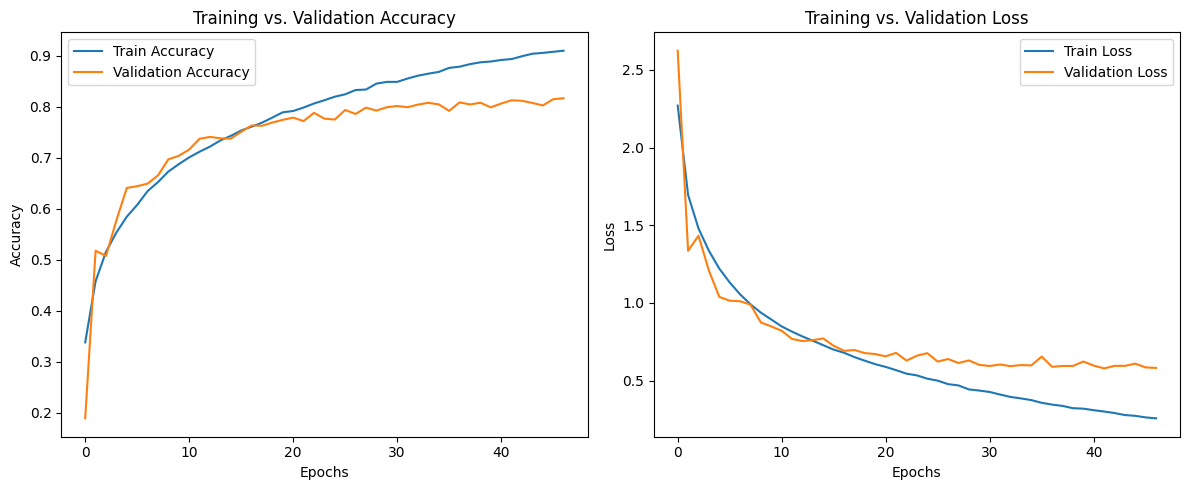

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()
